In [6]:
import numpy as np
from scipy import special
import matplotlib
import matplotlib.pyplot as plt

print(matplotlib.matplotlib_fname())
params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 9,
   'xtick.labelsize': 9,
   'ytick.labelsize': 9,
   'text.usetex': False,
   'figure.figsize': [8, 5],
   'errorbar.capsize': 3,
   'lines.linewidth': .8,
   'font.family': 'CMU Serif',
   'mathtext.fontset': 'cm'
}
plt.rcParams.update(params)

/usr/lib64/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


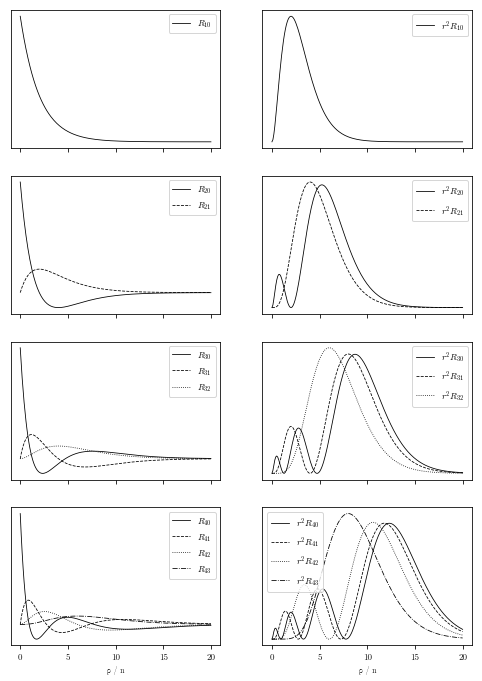

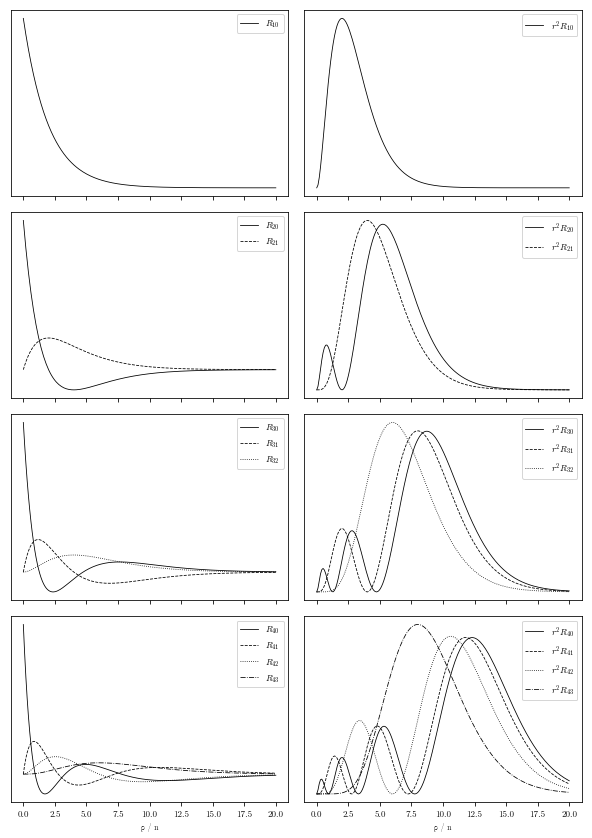

In [46]:
#x = np.linspace(-4, 4, 1000)

def R(n,l,x):
    return np.sqrt(np.math.factorial(n - l - 1) / (2. * n * np.math.factorial(n + l))) * np.exp(-x/2) * x**l * special.assoc_laguerre(x, n - l - 1, 2 * l + 1)
    

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col',figsize=(8.27,11.69))

a1 = [ax1, ax3, ax5, ax7]
a2 = [ax2, ax4, ax6, ax8]

#plt.tight_layout()
#plt.savefig("3b.pdf")
s = ["-", "--", ":", "-."]
x = np.linspace(0,20,200)
for n in range(1,5):
    for l in range(n):
        a1[n - 1].set_yticklabels([])
        a1[n - 1].set_yticks([])
        a1[n - 1].plot(x, R(n,l, x),linestyle=s[l], color="black",label=r"$R_{{{}{}}}$".format(n,l))
        a1[n - 1].legend()
ax7.set(xlabel="ρ / n")
    #plt.show()
    
for n in range(1,5):
    for l in range(n):
        a2[n - 1].set_yticklabels([])
        a2[n - 1].set_yticks([])
        a2[n - 1].plot(x, x*x*R(n,l, x)**2,linestyle=s[l], color="black",label=r"$r^2 R_{{{}{}}}$".format(n,l))
        a2[n - 1].legend()
ax8.set(xlabel="ρ / n")

plt.savefig('1.pdf')
plt.tight_layout()
plt.show()

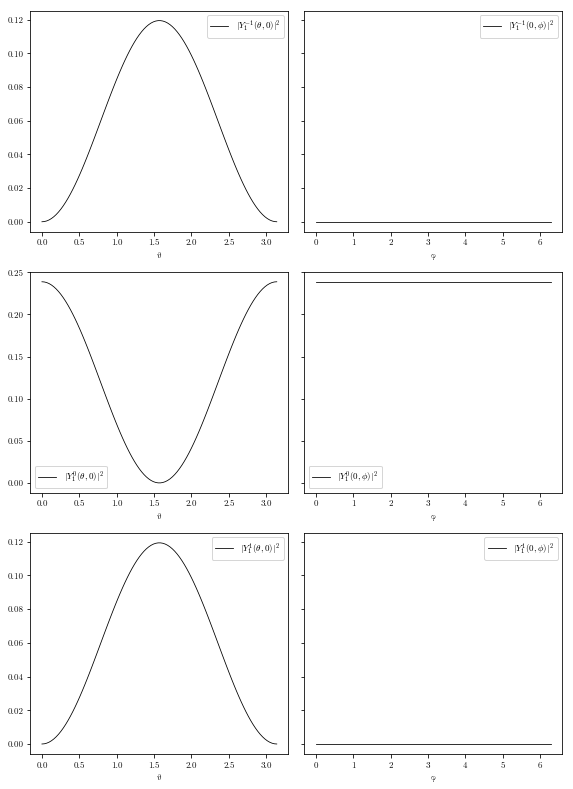

In [85]:
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)
one = np.linspace(1,1,100)
s = ["-", "--", ":", "-."]

def hs(l,m,θ,φ):
    if l == 1:
        if m == -1:
            return -np.sqrt(3/(8*np.pi)) * np.sin(θ) * np.exp(-1j*φ)
        elif m == 1:
            return np.sqrt(3/(8*np.pi)) * np.sin(θ) * np.exp(1j*φ)
        elif m == 0:
            return np.sqrt(3/(4*np.pi)) * np.cos(θ) * one

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharey='row',figsize=(8,11))

a1 = [ax1, ax2]
a2 = [ax3, ax4]
a3 = [ax5, ax6]

for [m, t] in [[-1, a1], [0, a2], [1, a3]]:
    t[0].plot(theta, np.abs(hs(1,m,theta,0))**2, label=r"$|Y_1^{{{}}}(\theta, 0)|^2$".format(m), color="black", linestyle=s[0])
    t[1].plot(phi, np.abs(hs(1,m,0,phi))**2, label=r"$|Y_1^{{{}}}(0, \phi)|^2$".format(m), color="black", linestyle=s[0])
    t[0].legend()
    t[1].legend()
    t[0].set(xlabel='θ')
    t[1].set(xlabel='φ')
plt.tight_layout()
plt.savefig('d.pdf')
plt.show()


# result = func(x[:,None], y[None,:])
#print(theta[:,None]*phi[None,:])

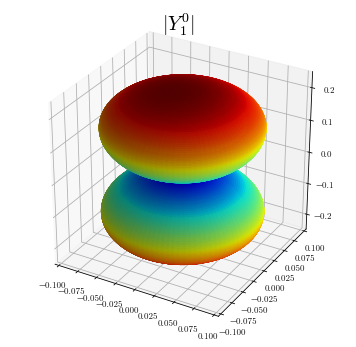

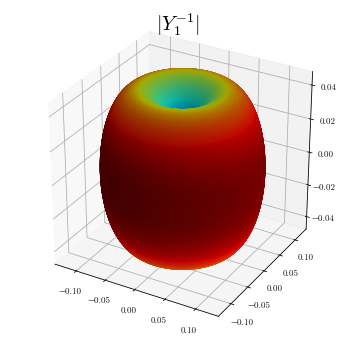

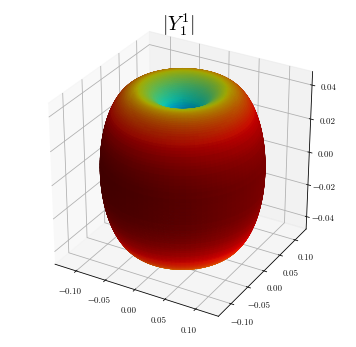

In [84]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

for m in [0,-1,1]:
    PHI, THETA = np.mgrid[0:np.pi:200j, 0:2*np.pi:100j] 
    R = np.abs(hs(1,m,PHI,THETA))**2
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.set_title(r'$|Y^{{{}}}_{}|$'.format(m,1), fontsize=20)
    N = R / R.max()
    plot = ax.plot_surface(
         X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N),
        linestyle="None", antialiased=True)

    plt.savefig('d{}.pdf'.format(m))
    plt.show()

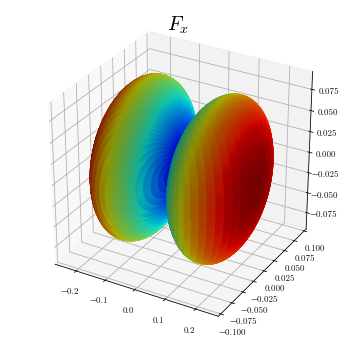

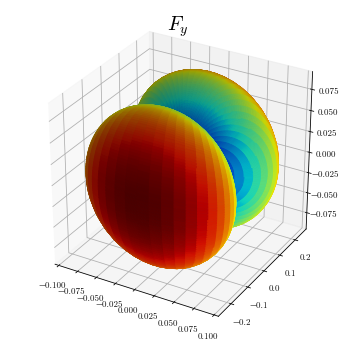

In [88]:
fx = lambda θ,φ: (1/np.sqrt(2)) * (hs(1,1,θ,φ) - hs(1,-1,θ,φ))
fy = lambda θ,φ: (1/np.sqrt(2)) * (hs(1,1,θ,φ) + hs(1,-1,θ,φ))
fz = lambda θ,φ: hs(1,0,θ,φ)

from mpl_toolkits.mplot3d import axes3d, Axes3D

for [f,n] in [[fx,"$F_x$"],[fy,"$F_y$"]]:
    PHI, THETA = np.mgrid[0:np.pi:200j, 0:2*np.pi:100j] 
    R = np.abs(f(PHI,THETA))**2
    X = R * np.sin(PHI) * np.cos(THETA)
    Y = R * np.sin(PHI) * np.sin(THETA)
    Z = R * np.cos(PHI)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.set_title(n, fontsize=20)
    N = R / R.max()
    plot = ax.plot_surface(
         X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N),
        linestyle="None", antialiased=True)

    plt.savefig('e{}.pdf'.format(n))
    plt.show()